# Exploratory Data Analysis (EDA) of UCI Bank Marketing Dataset

## Dataset Overview
##### "The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed."
##### Moro, S., P. Rita, and P. Cortez. "Bank Marketing." UCI Machine Learning Repository, 2014, https://doi.org/10.24432/C5K306.

## Variables
1. **age**: Age of the customer.
2. **job**: Type of job (e.g., admin, technician, management).
3. **marital**: Marital status (e.g., single, married, divorced).
4. **education**: Education level (e.g., primary, secondary, tertiary).
5. **default**: Whether the customer has credit in default (`yes` or `no`).
6. **balance**: Average yearly account balance in euros.
7. **housing**: Whether the customer has a housing loan (`yes` or `no`).
8. **loan**: Whether the customer has a personal loan (`yes` or `no`).
9. **contact**: Contact communication type (e.g., cellular, telephone).
10. **day**: Last contact day of the month (1 to 31).
11. **month**: Last contact month of the year (e.g., jan, feb, mar).
12. **duration**: Duration of the last contact with the customer (in seconds).
13. **campaign**: Number of contacts performed during this campaign.
14. **pdays**: Number of days since the customer was last contacted in a previous campaign (-1 means the customer was not previously contacted).
15. **previous**: Number of contacts performed before this campaign.
16. **poutcome**: Outcome of the previous marketing campaign (e.g., success, failure, unknown).
17. **y**: Target variable — whether the customer subscribed to a product (`yes` or `no`).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Dataset used ";" as a delimiter therefore, that needs to be specified.
df = pd.read_csv("/content/drive/MyDrive/Job Search/Portfolio/Final Portfolio Projects/Bank_Marketing/bank.csv", delimiter=';', quotechar='"')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
# Checking for null values
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
# Checking for duplicates
df.duplicated().sum()

0

In [ ]:
# Ensuring unique features
df.nunique()

,0
age,67
job,12
marital,3
education,4
default,2
balance,2353
housing,2
loan,2
contact,3
day,31


## Exploratory Data Analysis

In [ ]:
# Quick analysis of numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


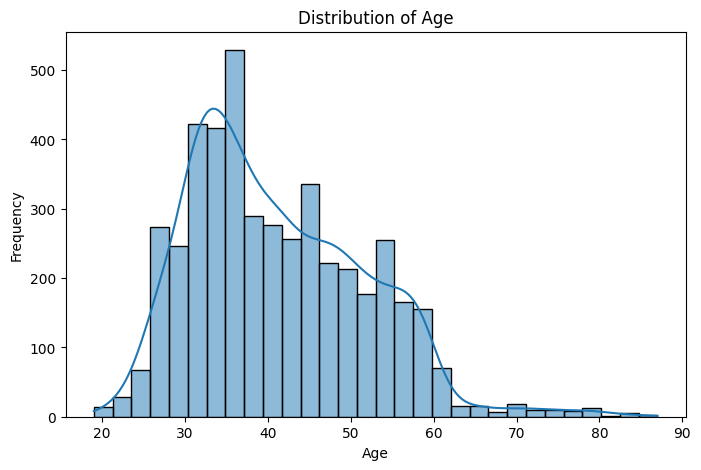

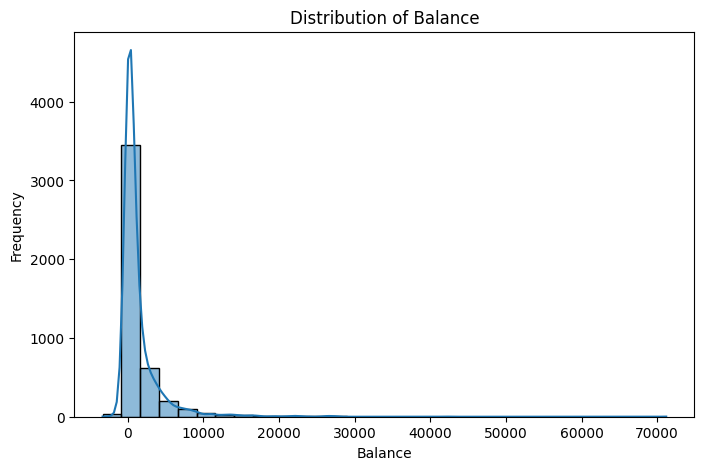

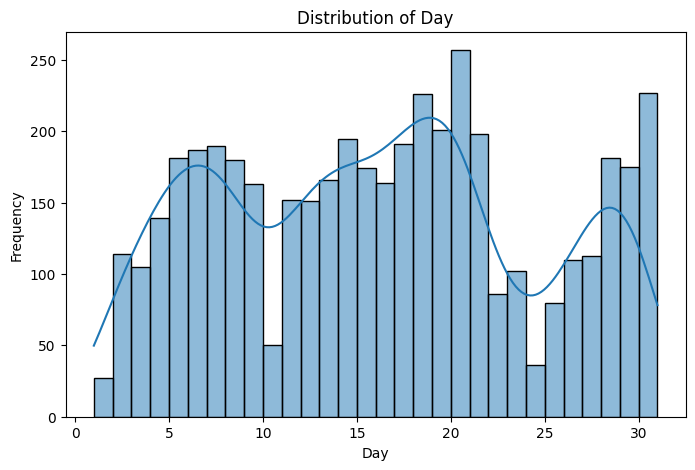

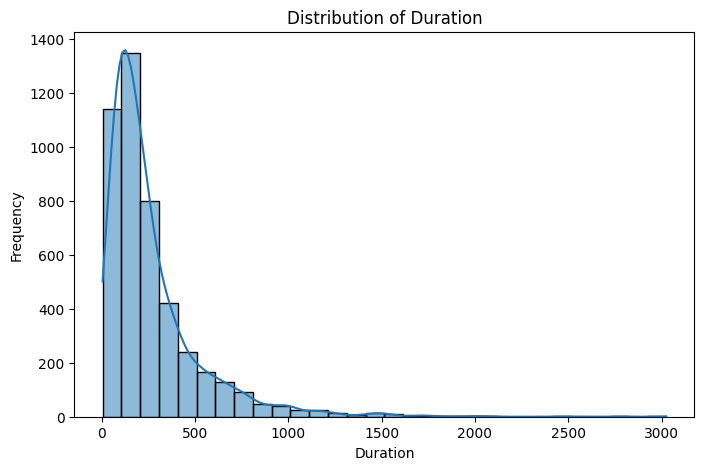

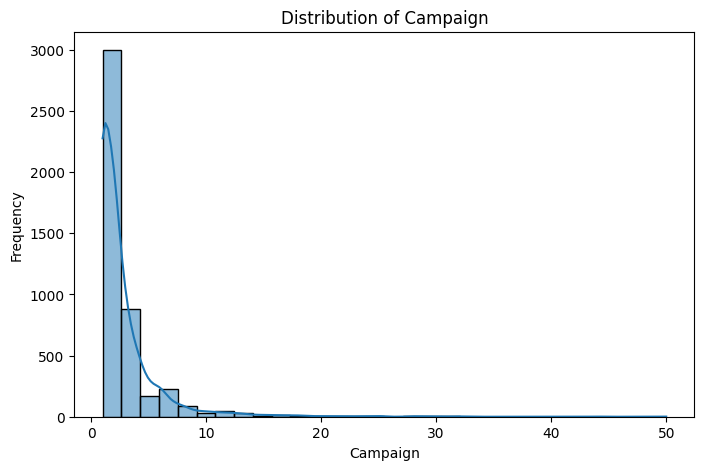

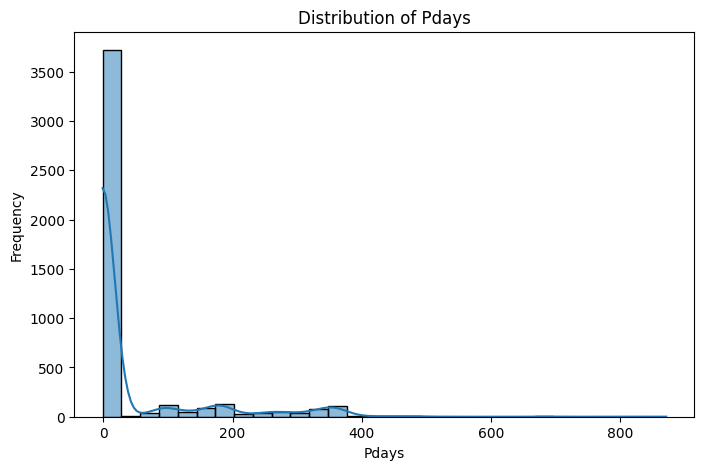

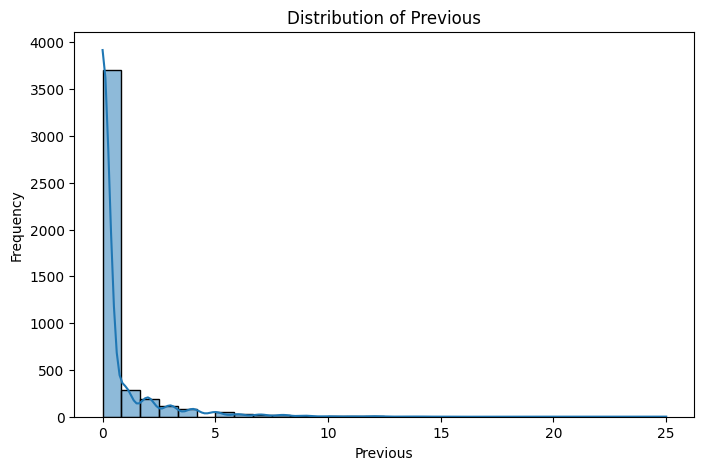

In [ ]:
# Numerical column distributions
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.show()

### **Observations from the histograms:**
- The distribution of `age` is slightly right skewed and `day` is normal.
- The distribution of `balance`, `duration`, `campaign`, `pdays`, `previous` are heavily skewed to the right.

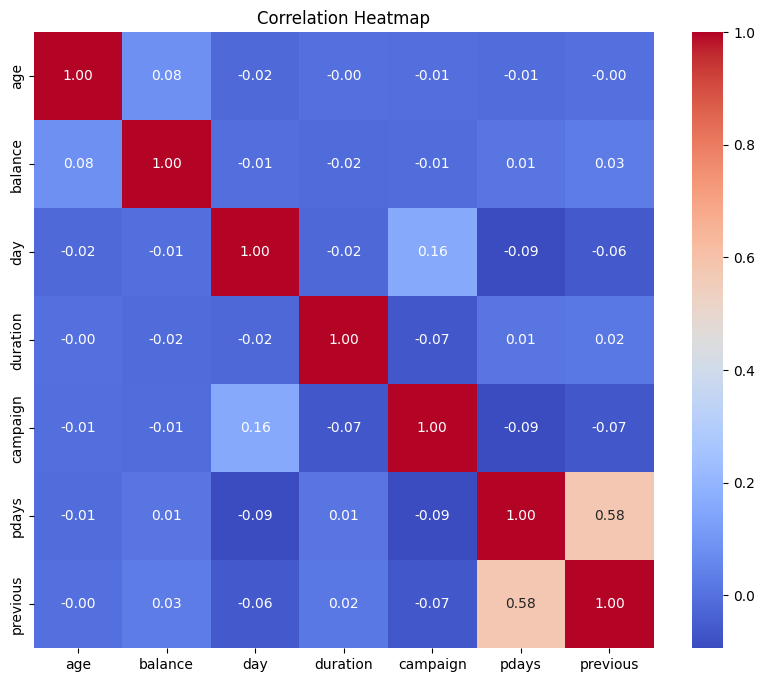

In [ ]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(10, 8))
correlation = df[numerical_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### **Observations from the heatmap:**
1. Moderate correlation between `pdays` and `previous` (0.58).  There is a possibility for feature redundancy, but since the correlation is not high, it will not be removed.
2. Low correlations between all of the other columns.  This tells us the columns should provide unique clustering information.

In [ ]:
# Quick analysis of categorical columns
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


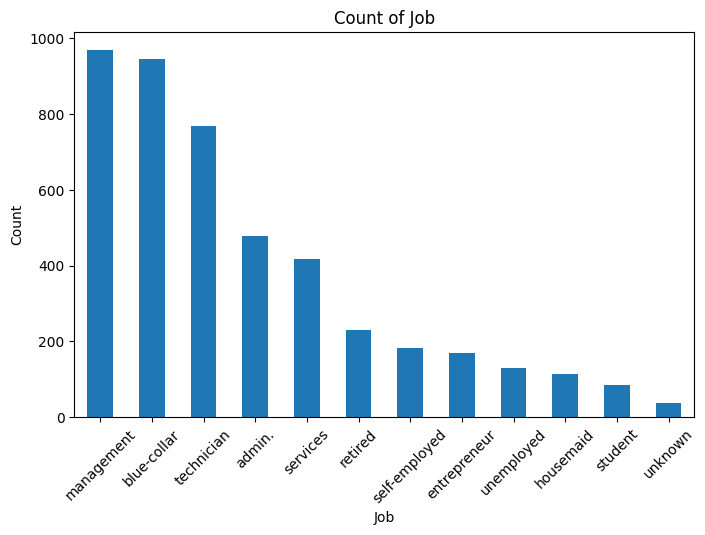

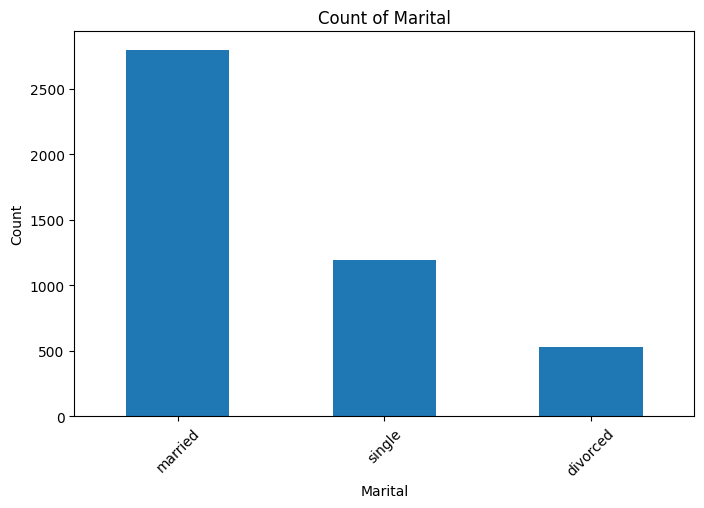

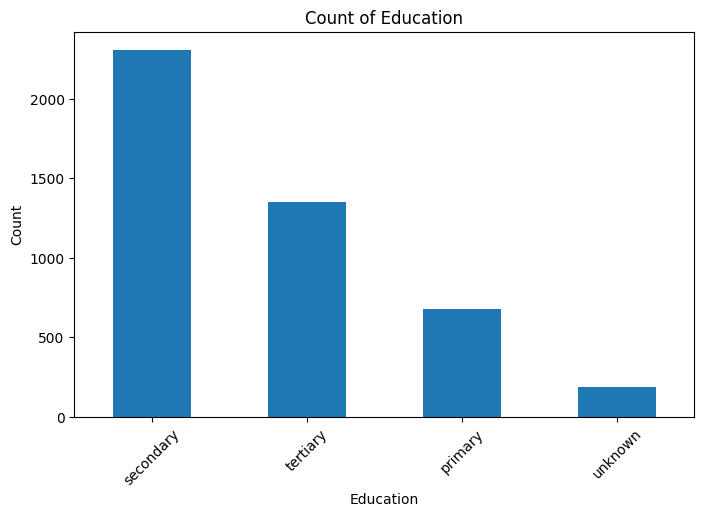

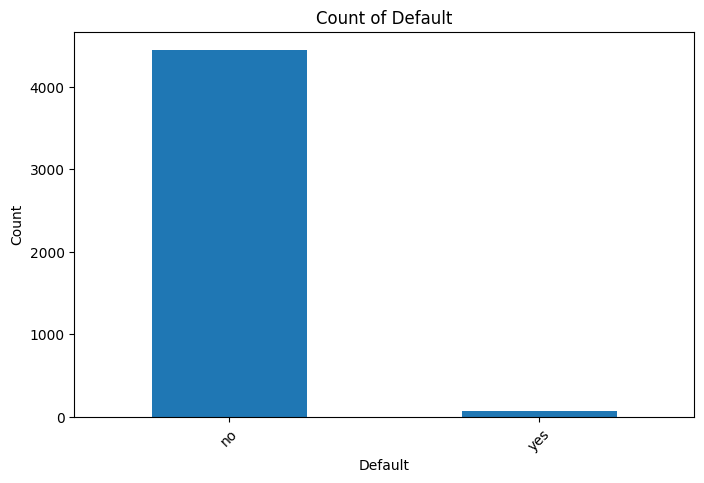

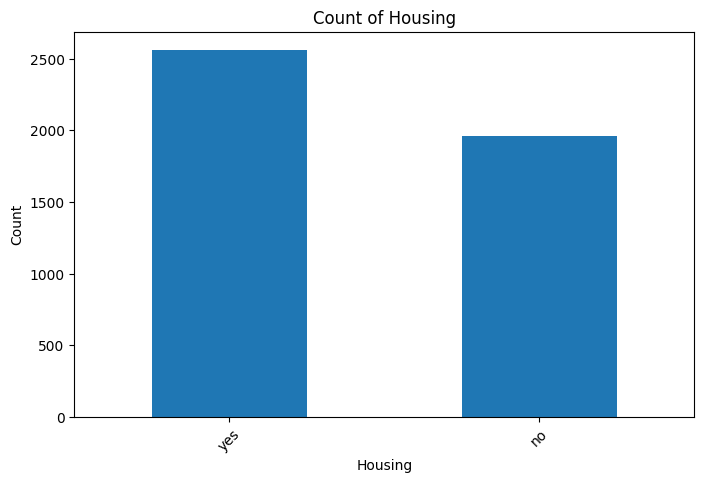

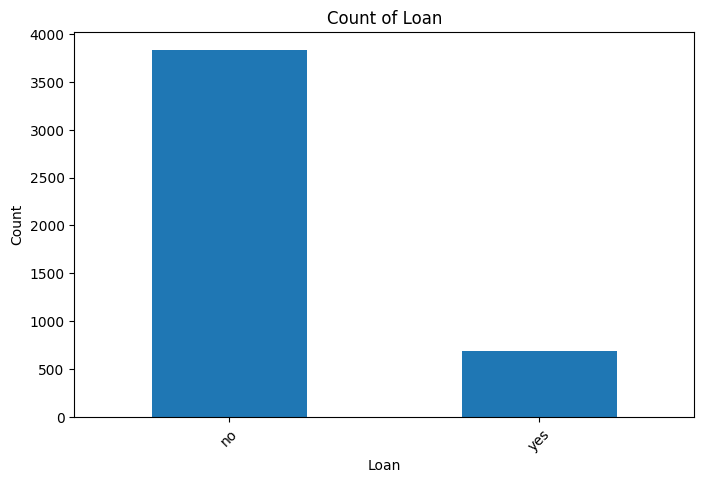

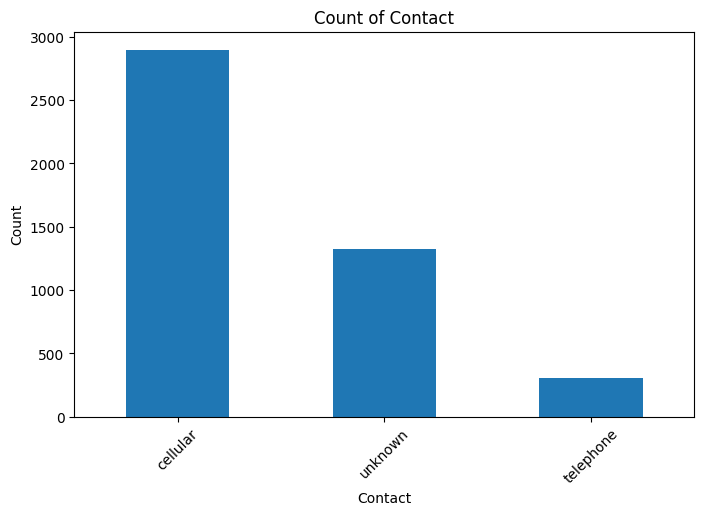

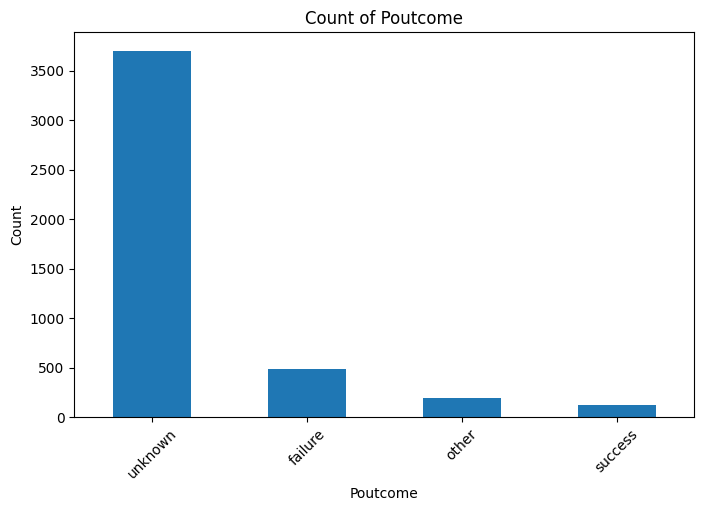

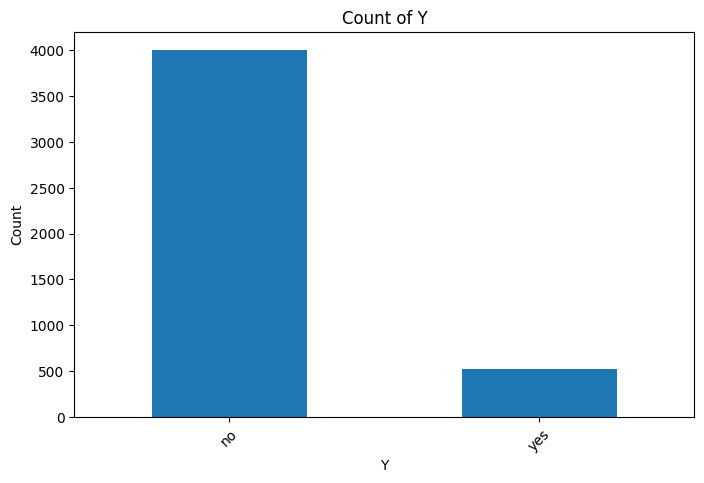

In [ ]:
# Categorical column distributions
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y']

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Count of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

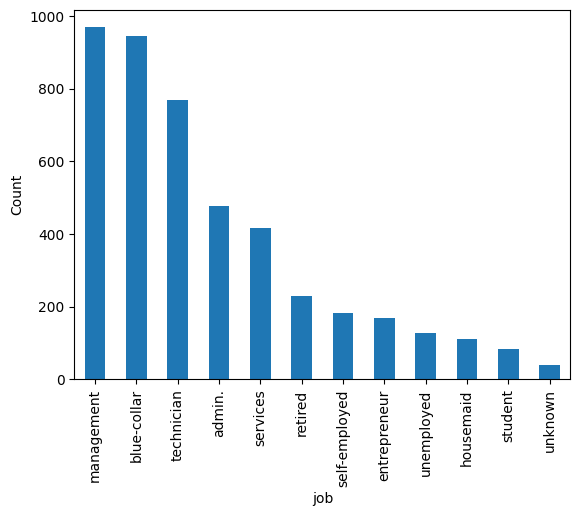

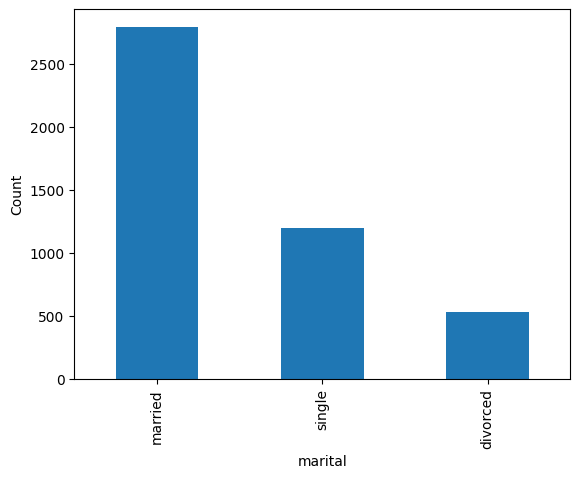

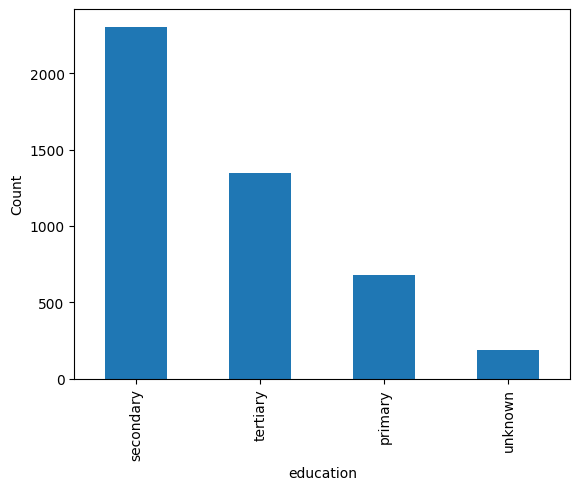

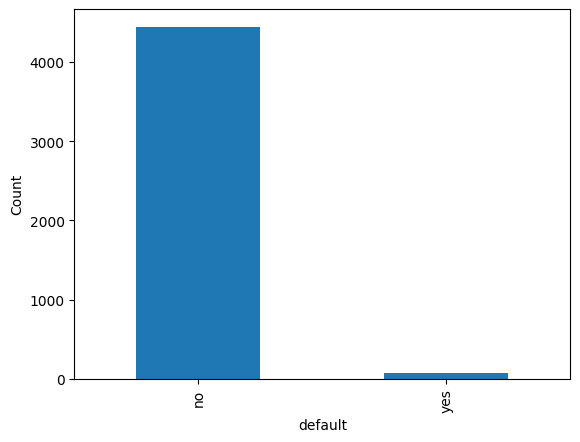

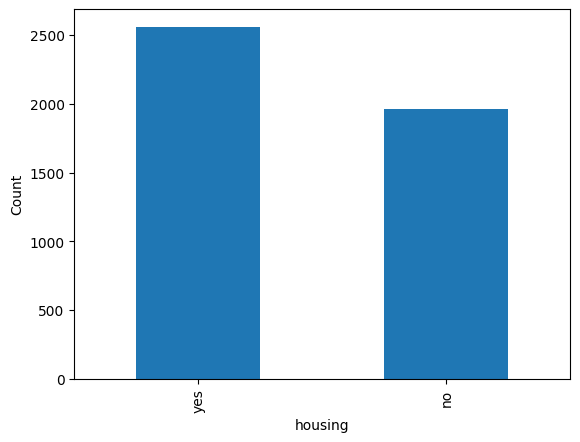

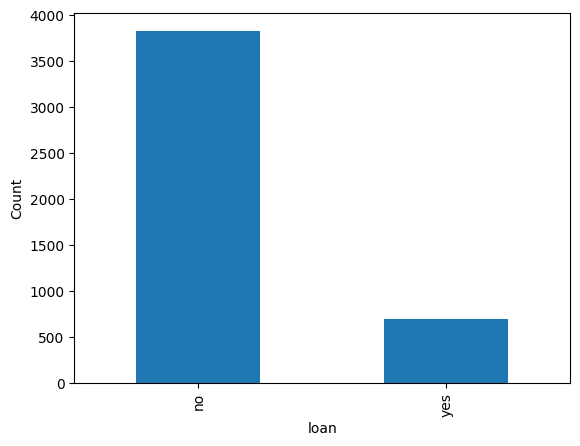

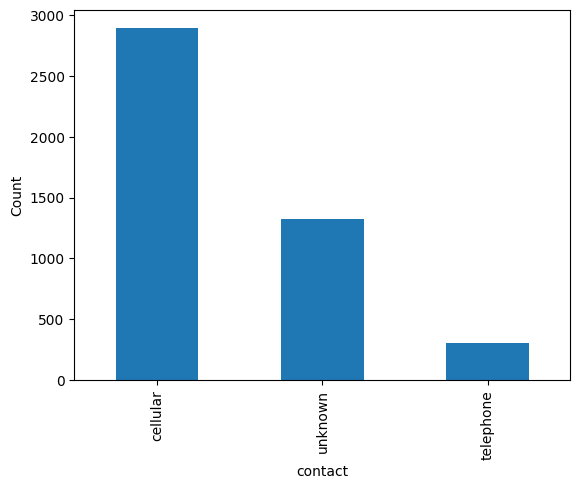

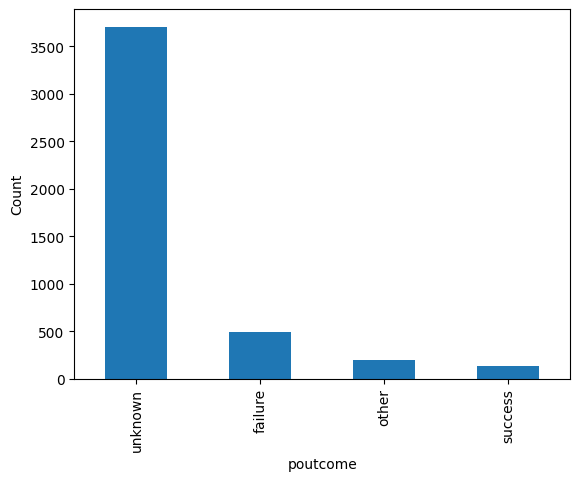

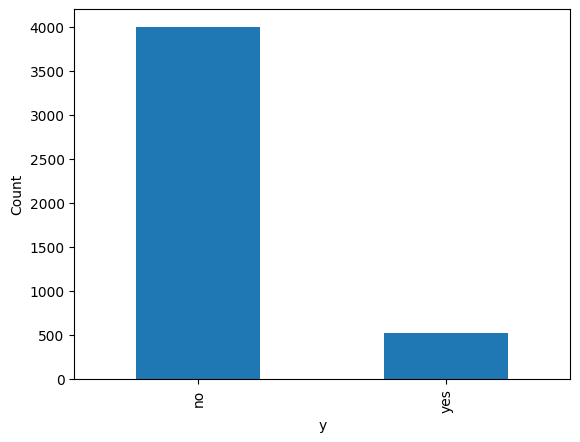

In [ ]:
for col in categorical_cols:
    df[col].value_counts().plot(kind='bar')
    plt.ylabel('Count')
    plt.show()

### Bivariate Analysis

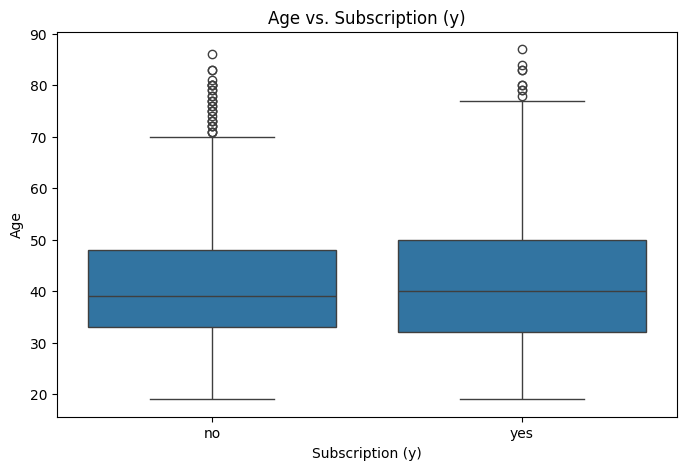

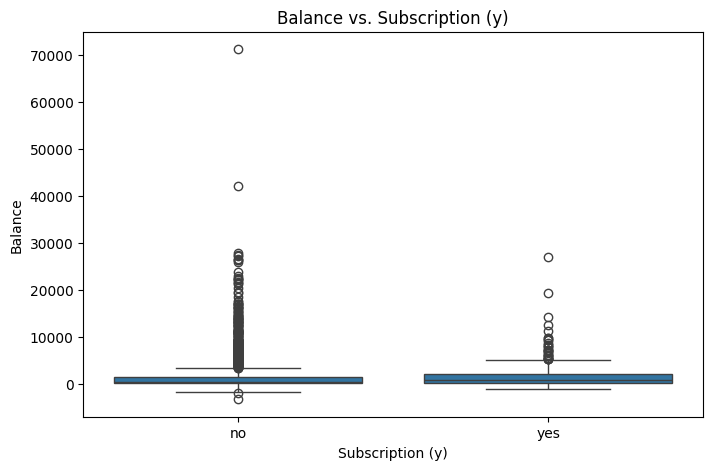

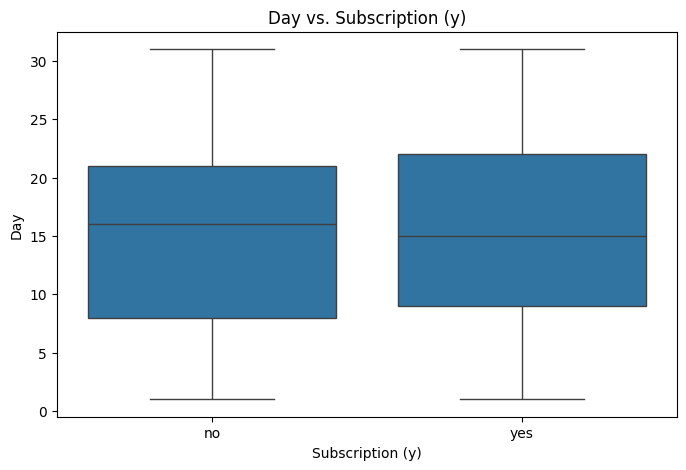

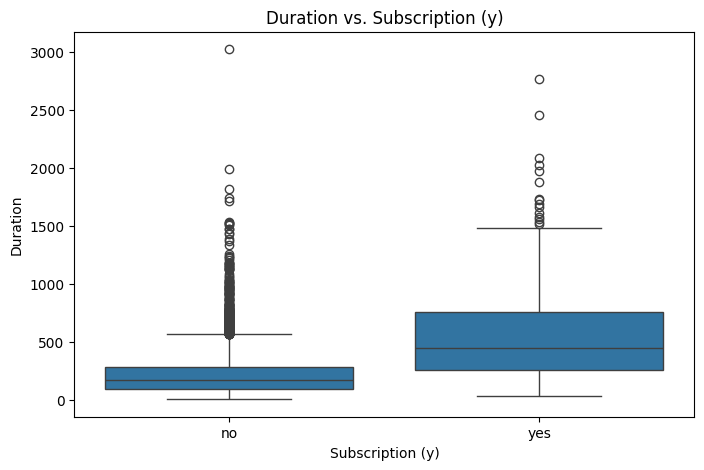

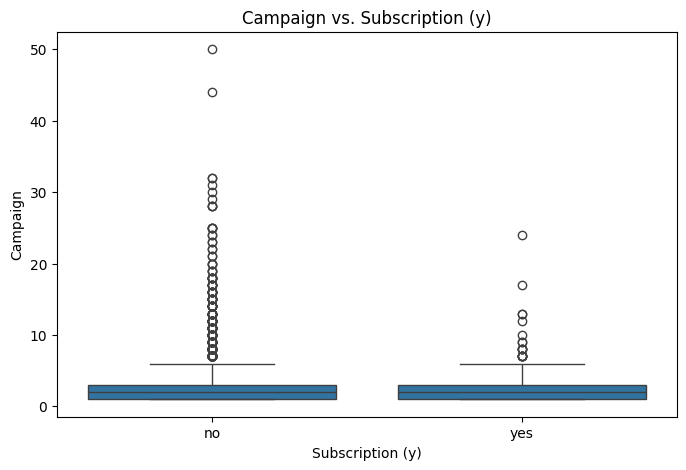

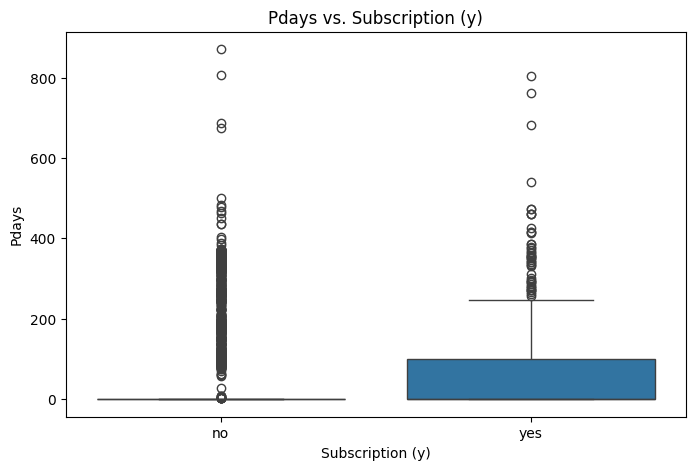

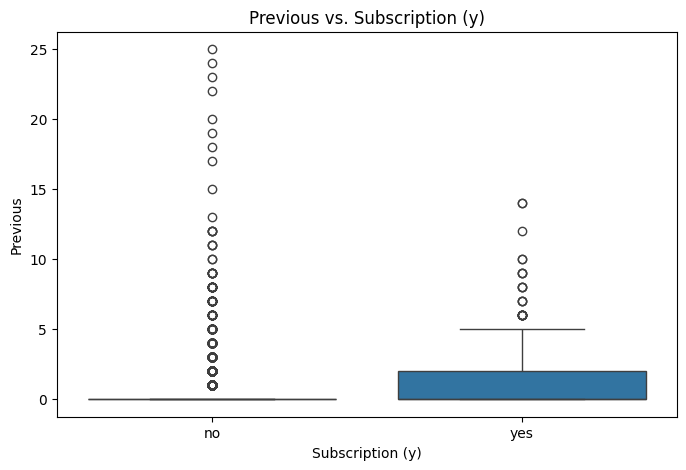

In [ ]:
# Numerical variables vs. the target variable Subscription(y)
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f'{col.capitalize()} vs. Subscription (y)')
    plt.xlabel('Subscription (y)')
    plt.ylabel(col.capitalize())
    plt.show()

### Observations from boxplots:
- Longer `duration` on the phone seems to have an influence on whether someone has a subscription (`y`).

### Observations from bar chart of categorical variables vs. Subscription (`y`):

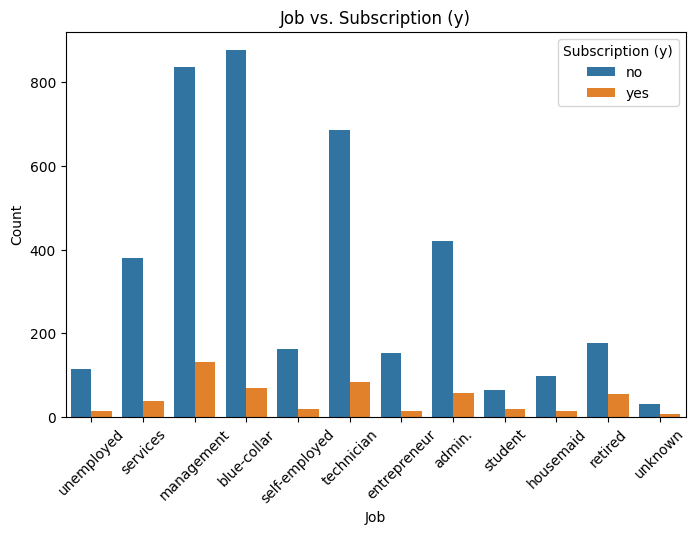

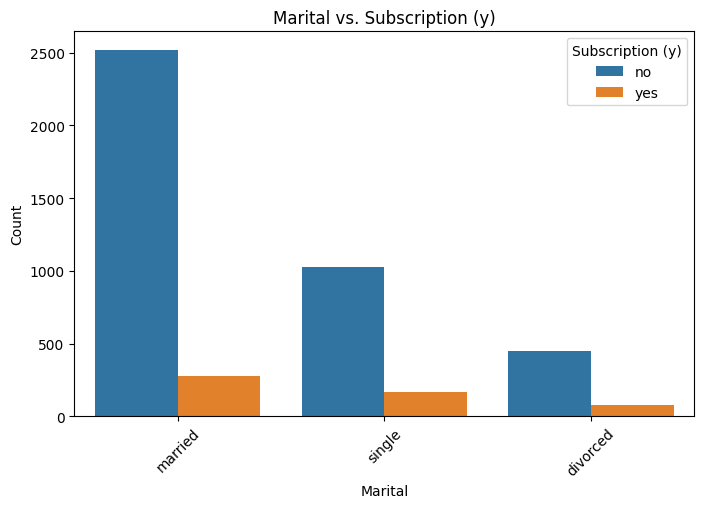

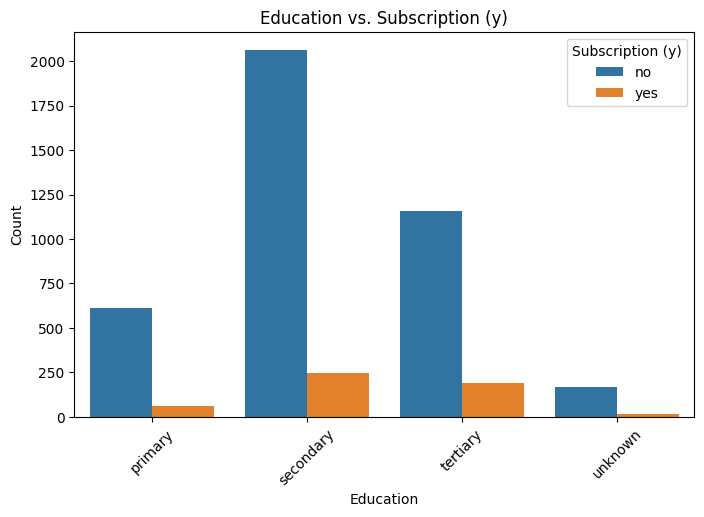

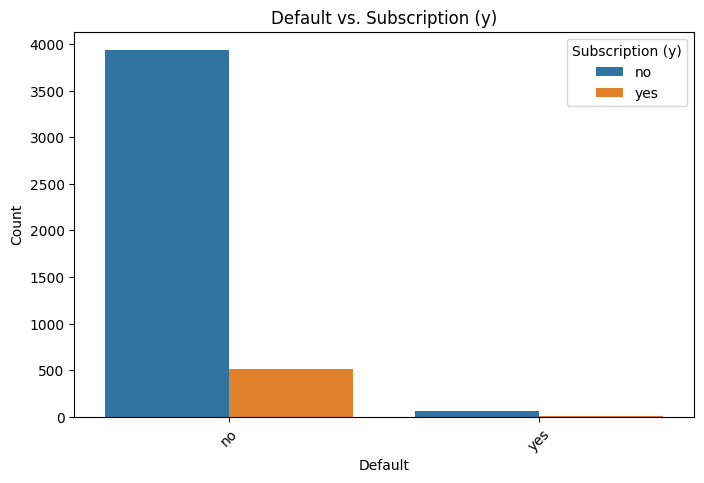

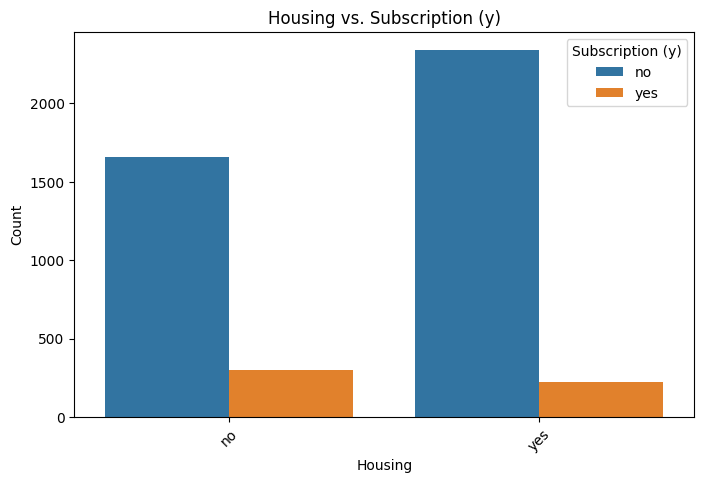

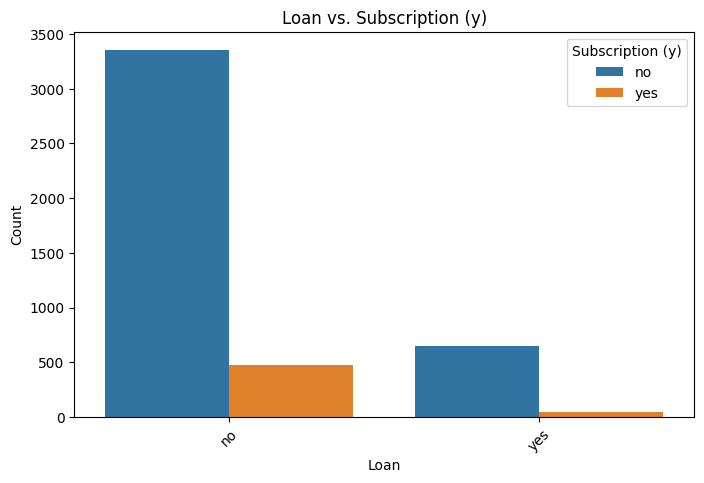

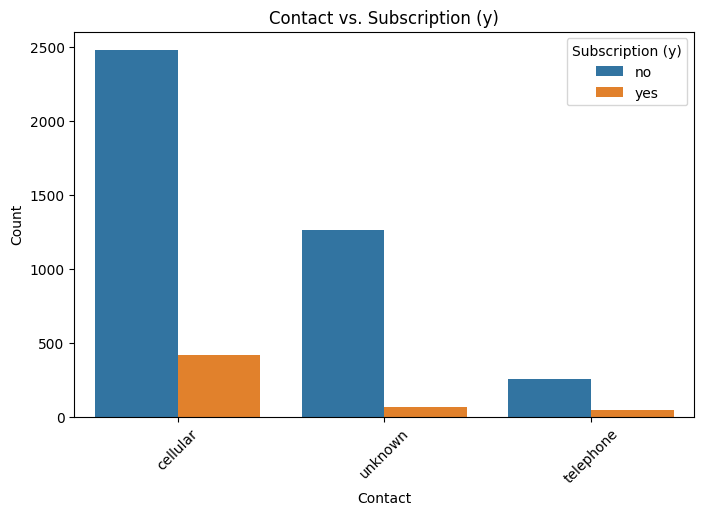

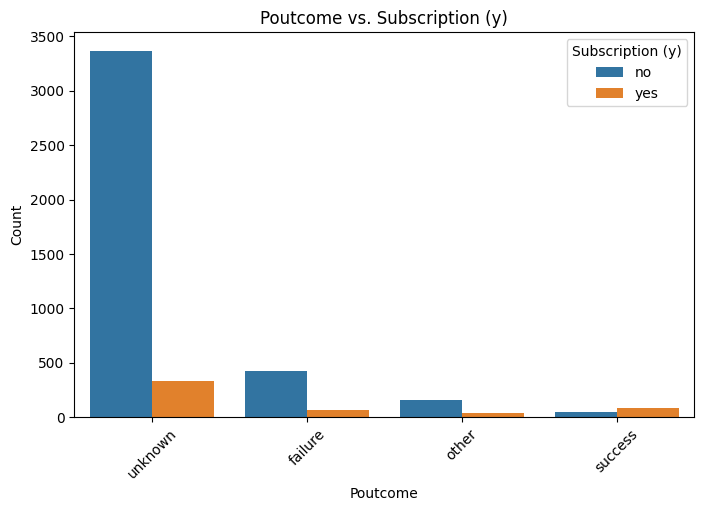

<ipython-input-15-927e19ec578e>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Subscription (y)', loc='upper right')


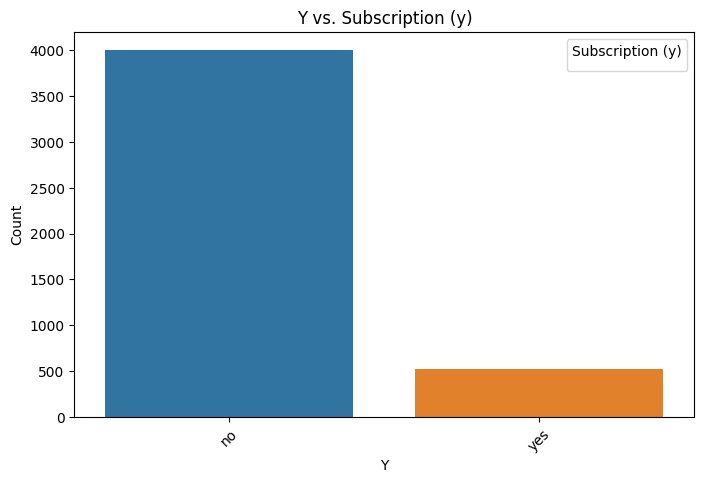

In [ ]:
# Categorical variables vs. the target variable Subscription (y)
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='y', data=df)
    plt.title(f'{col.capitalize()} vs. Subscription (y)')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Subscription (y)', loc='upper right')
    plt.show()

#### -- end